In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import time
import tensorflow as tf

## Load the data from the file

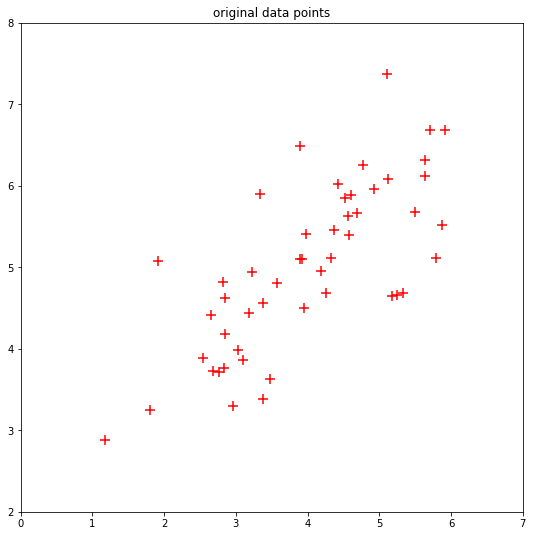

<class 'numpy.ndarray'> [3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 3.47581 5.9113  3.92889
 4.56184 4.57407 4.37173 4.19169 5.24409 2.83584 5.63527 4.68633 2.85051
 5.11016 5.18256 5.70733 3.57968 5.63938 4.26347 2.53652 3.22383 4.92949
 5.79296 2.81685 3.88882 3.34323 5.87973 3.10392 5.33151 3.37543 4.77668
 2.67575 5.50028 1.7971  4.32251 4.421   3.1793  3.03354 4.60935 2.96379
 3.97176 1.18023 1.91895 3.95525 5.11795]


In [22]:
data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]
n = data.shape[0]

plt.figure(1,figsize=(9,9))
plt.scatter(x, y, s=100, c='r', marker='+', label='data')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.title('original data points')
plt.show()
print(type(x), x)

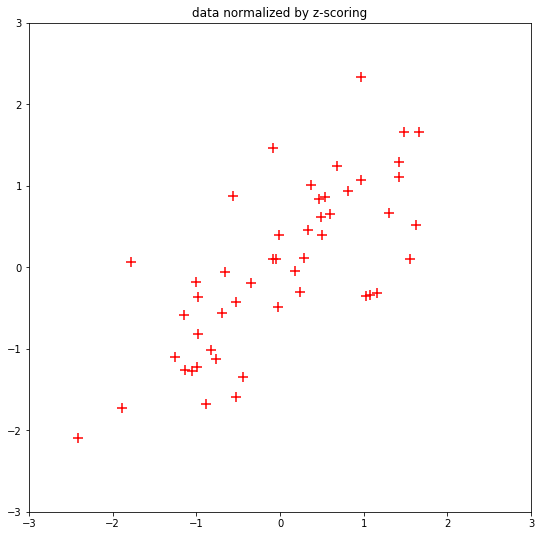

In [17]:
xn, yn = normalize_data(x, y)

plt.figure(2,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('data normalized by z-scoring')
plt.show()

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0.70710678 0.70710678] [-0.70710678  0.70710678]
(2,)


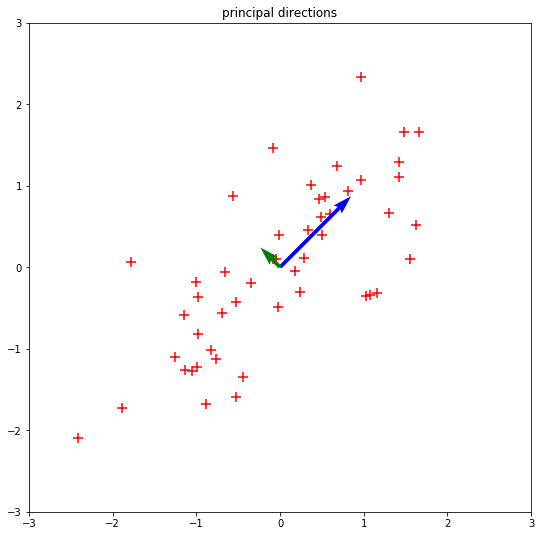

In [86]:
data_n = np.zeros((n, 2))

data_n[:,0] = xn
data_n[:,1] = yn
#print(data_n)

covar = compute_covariance(xn, yn)
print(covar)

dir = compute_principal_direction(covar)
print(dir)

vec1 = dir[:,0]
vec2 = dir[:,1]
print(vec1, vec2)
print(vec1.shape)

plt.figure(3,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.quiver(0, 0, vec1[0], vec1[1], color='b', scale=5, pivot='tail')
plt.quiver(0, 0, vec2[0], vec2[1], color='g', pivot='tail')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('principal directions')
plt.show()

[[-1.058055    0.6520829  -0.865779   -1.16238927 -0.90030097  0.69071439
  -0.8971826   1.65567919  0.02120705  0.55276016  0.44666233  0.39089012
   0.06341096  0.37183804 -1.10602267  1.3548874   0.62705978 -0.67604566
   1.64753055  0.33795229  1.56798978 -0.2750713   1.26206331 -0.0365951
  -1.17741914 -0.35930365  0.87476969  0.82871892 -0.59553519  0.00490181
   0.16117573  1.06991934 -0.94663328  0.41897851 -0.48017708  0.9567013
  -1.19323714  0.98454723 -1.81013869  0.19692974  0.69068354 -0.62805179
  -0.91687964  0.6998003  -1.28178733  0.19230743 -2.25777857 -0.85771369
  -0.26016207  1.02009704]
 [-1.058055    0.6520829  -0.865779   -1.16238927 -0.90030097  0.69071439
  -0.8971826   1.65567919  0.02120705  0.55276016  0.44666233  0.39089012
   0.06341096  0.37183804 -1.10602267  1.3548874   0.62705978 -0.67604566
   1.64753055  0.33795229  1.56798978 -0.2750713   1.26206331 -0.0365951
  -1.17741914 -0.35930365  0.87476969  0.82871892 -0.59553519  0.00490181
   0.16117573 

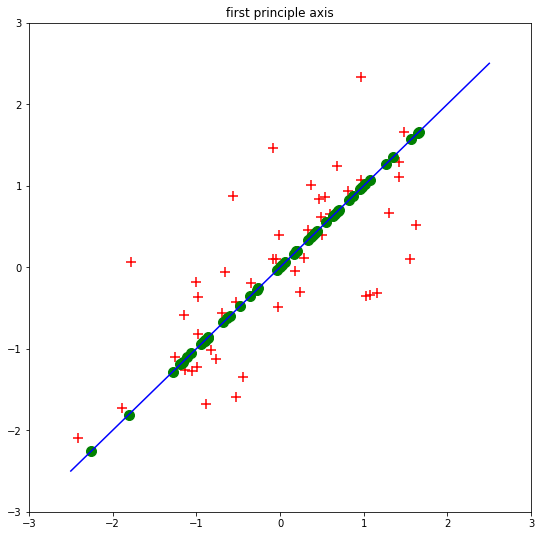

In [157]:
proj_1st = compute_projection(data_n, vec1)

print(proj_1st)
print(proj_1st[:,0])
print(data_n)

plt.figure(7,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_1st, y_1st, c='b')
plt.scatter(proj_1st[0], proj_1st[1], s=100, c='g')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

[-0.5233151 -1.058055 ]
[-2.5        -2.23684211 -1.97368421 -1.71052632 -1.44736842 -1.18421053
 -0.92105263 -0.65789474 -0.39473684 -0.13157895  0.13157895  0.39473684
  0.65789474  0.92105263  1.18421053  1.44736842  1.71052632  1.97368421
  2.23684211  2.5       ]


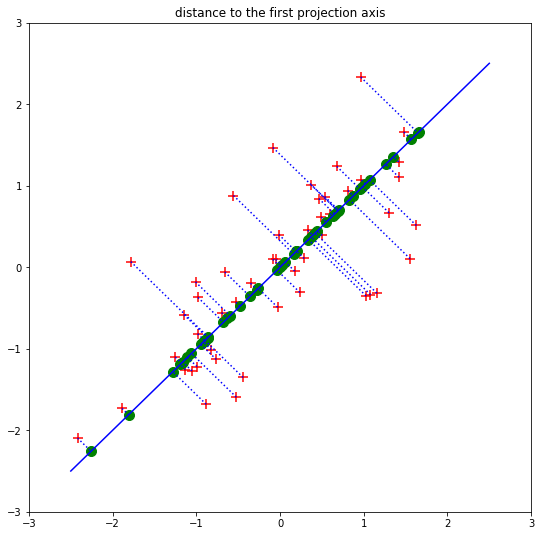

In [201]:
proj_1st = compute_projection(data_n, vec1)

# print(proj_1st)
# print(proj_1st[:,0])
# print(data_n)

x_proj_1st = np.zeros((len(xn),2))
y_proj_1st = np.zeros((len(yn),2))

x_proj_1st[:,0] = xn
x_proj_1st[:,1] = proj_1st[0]
y_proj_1st[:,0] = yn
y_proj_1st[:,1] = proj_1st[1]

print(x_proj_1st[0])
print(x_1st)

plt.figure(7,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_1st, y_1st, c='b')
plt.scatter(proj_1st[0], proj_1st[1], s=100, c='g')
for i in range(len(xn)):
    plt.plot(x_proj_1st[i], y_proj_1st[i], linestyle=':', c='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('distance to the first projection axis')
plt.show()

In [183]:
array = np.zeros(3)
new_arr = array.reshape(-1,1) 
print(new_arr)

print(xn)
print(proj_1st[0])

[[0.]
 [0.]
 [0.]]
[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134 -0.0849036
 -0.4421533   1.65512791 -0.05199109  0.49306315  0.50359481  0.32935312
  0.17431471  1.08057125 -0.99325269  1.41742932  0.60026562 -0.98061987
  0.96523968  1.02758572  1.47948257 -0.3527074   1.42096858  0.23612685
 -1.25100707 -0.65914163  0.80965876  1.55322141 -1.00960561 -0.08649669
 -0.55632233  1.62794193 -0.76240011  1.15585151 -0.52859385  0.678069
 -1.1311115   1.30118495 -1.88774615  0.28696815  0.37178115 -0.69748789
 -0.82300666  0.53397558 -0.8830707  -0.01507431 -2.41895336 -1.78281708
 -0.02929162  0.97194791]
[-1.058055    0.6520829  -0.865779   -1.16238927 -0.90030097  0.69071439
 -0.8971826   1.65567919  0.02120705  0.55276016  0.44666233  0.39089012
  0.06341096  0.37183804 -1.10602267  1.3548874   0.62705978 -0.67604566
  1.64753055  0.33795229  1.56798978 -0.2750713   1.26206331 -0.0365951
 -1.17741914 -0.35930365  0.87476969  0.82871892 -0.59553519  0.00490181
  0.161175

[[ 5.34739897e-01 -1.88263833e-01 -2.82615439e-01  1.08331967e-01
  -8.37203723e-02 -7.75617984e-01  4.55029296e-01 -5.51284376e-04
  -7.31981376e-02 -5.96970076e-02  5.69324762e-02 -6.15370002e-02
   1.10903747e-01  7.08733207e-01  1.12769984e-01  6.25419212e-02
  -2.67941638e-02 -3.04574210e-01 -6.82290870e-01  6.89633433e-01
  -8.85072014e-02 -7.76360996e-02  1.58905264e-01  2.72721950e-01
  -7.35879271e-02 -2.99837980e-01 -6.51109324e-02  7.24502482e-01
  -4.14070420e-01 -9.13985063e-02 -7.17498064e-01  5.58022593e-01
   1.84233169e-01  7.36873004e-01 -4.84167641e-02 -2.78632303e-01
   6.21256379e-02  3.16637725e-01 -7.76074585e-02  9.00384035e-02
  -3.18902387e-01 -6.94361037e-02  9.38729769e-02 -1.65824719e-01
   3.98716624e-01 -2.07381737e-01 -1.61174797e-01 -9.25103384e-01
   2.30870458e-01 -4.81491299e-02]
 [-5.34739897e-01  1.88263833e-01  2.82615439e-01 -1.08331967e-01
   8.37203723e-02  7.75617984e-01 -4.55029296e-01  5.51284376e-04
   7.31981376e-02  5.96970076e-02 -5.6932

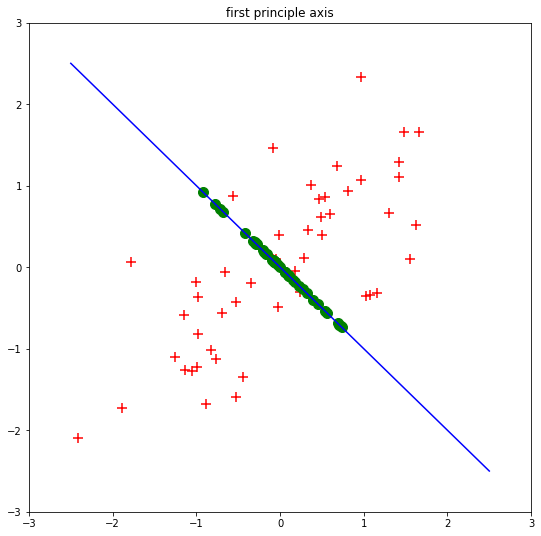

In [152]:
proj_2nd = compute_projection(data_n, vec2)

print(proj_2nd)

plt.figure(7,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_2nd, y_2nd, c='b')
plt.scatter(proj_2nd[0], proj_2nd[1], s=100, c='g')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

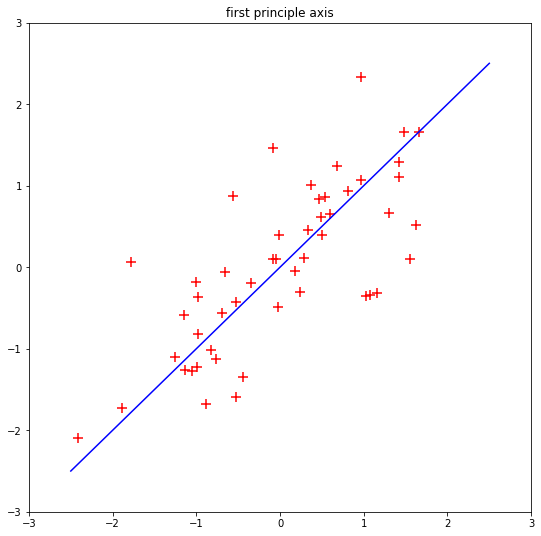

In [78]:
axis_1st = vec1[1] / vec1[0]
x_1st = np.linspace(-2.5, 2.5, 20)
y_1st = axis_1st * x_1st

plt.figure(4,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_1st, y_1st, c='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

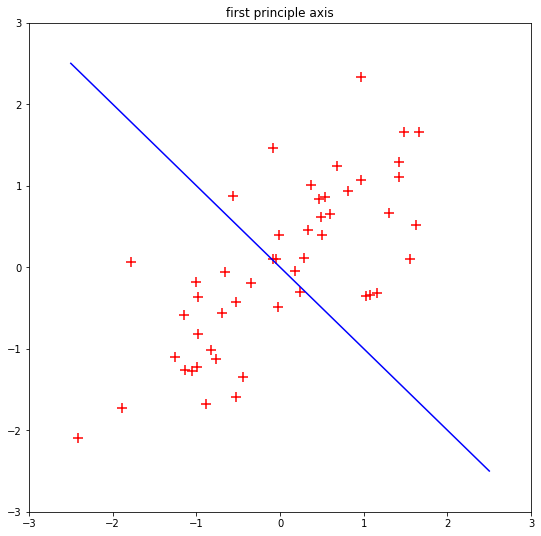

In [80]:
axis_2nd = vec2[1] / vec2[0]
x_2nd = np.linspace(-2.5, 2.5, 20)
y_2nd = axis_2nd * x_2nd

plt.figure(5,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_2nd, y_2nd, c='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

## Define funcitons

In [154]:
def normalize_data(x, y):
    
    xn = np.zeros(len(x))
    yn = np.zeros(len(y))

    xn = (x - np.mean(x)) / np.std(x) # normalize x. the mean of xn is zero and the standard deviation of xn is one #
    yn = (y - np.mean(y)) / np.std(y)# normalize y. the mean of yn is zero and the standard deviation of yn is one #

    return xn, yn


def compute_covariance(x, y):
    
    data_n = np.zeros((len(x), 2))
    data_n[:,0] = x
    data_n[:,1] = y
    
    covar = np.cov(data_n.T) # compute the covariance matrix #
    
    return covar

# def compute_covariance2(x, y):
    
#     data_n = np.zeros((len(x), 2))
#     data_n[:,0] = x
#     data_n[:,1] = y
    
#     covar = 1 / len(x) * data_n.T @ data_n # compute the covariance matrix #
    
#     return covar


def compute_principal_direction(covariance):

    eig = np.linalg.eig
    direction = eig(covariance)[1] # compute the principal directions from the co-variance matrix #
    
    return direction


def compute_projection(point, axis):
    
#     a = (point@axis).T
#     b = a[:,np.newaxis]
#     projection = b * axis / (axis@axis) # compute the projection of point on the axis #
    axis_new = axis[:,np.newaxis]
    projection = axis_new @ axis_new.T @ point.T
    
    return projection


def compute_distance(point1, point2):

    distance = sum([(el_a - el_b)**2 for el_a, el_b in list(zip(point1, point2))]) # compute the Euclidean distance between point1 and point2 #
    
    return distance


## 1. Plot the original data points [1pt]

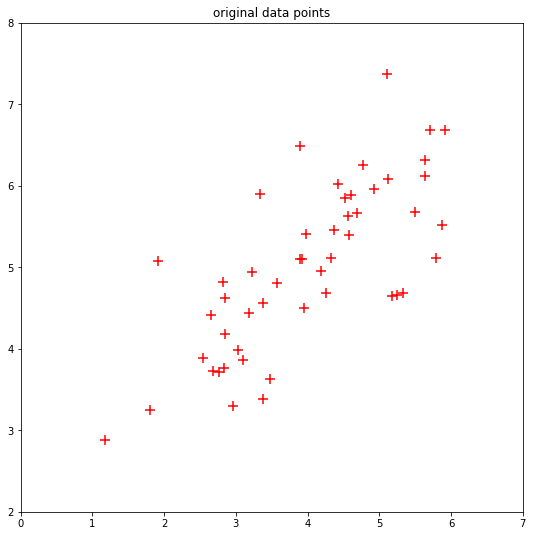

<class 'numpy.ndarray'> [3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 3.47581 5.9113  3.92889
 4.56184 4.57407 4.37173 4.19169 5.24409 2.83584 5.63527 4.68633 2.85051
 5.11016 5.18256 5.70733 3.57968 5.63938 4.26347 2.53652 3.22383 4.92949
 5.79296 2.81685 3.88882 3.34323 5.87973 3.10392 5.33151 3.37543 4.77668
 2.67575 5.50028 1.7971  4.32251 4.421   3.1793  3.03354 4.60935 2.96379
 3.97176 1.18023 1.91895 3.95525 5.11795]


In [19]:
plt.figure(1,figsize=(9,9))
plt.scatter(x, y, s=100, c='r', marker='+', label='data')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.title('original data points')
plt.show()
print(type(x), x)

## 2. Plot the normalized data points [1pt]

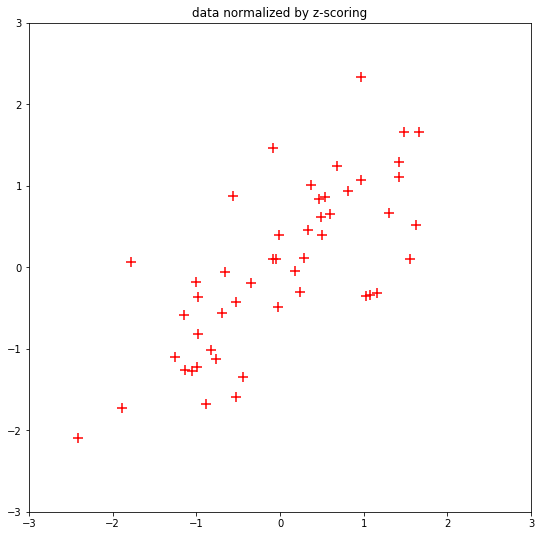

In [20]:
plt.figure(2,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('data normalized by z-scoring')
plt.show()

## 3. Plot the principal axes [2pt]

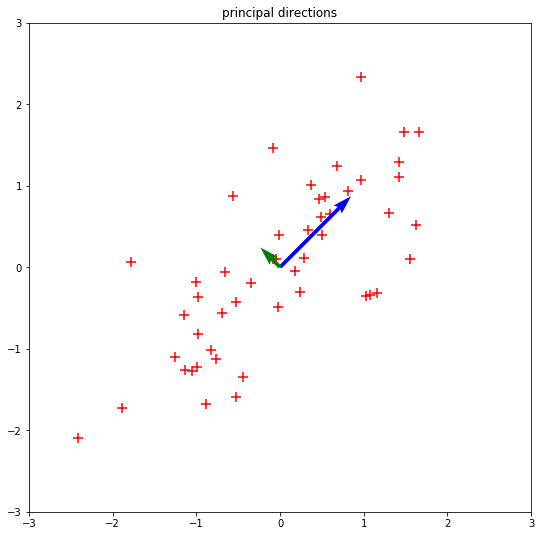

In [72]:
plt.figure(3,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.quiver(0, 0, vec1[0], vec1[1], color='b', scale=5, pivot='tail')
plt.quiver(0, 0, vec2[0], vec2[1], color='g', pivot='tail')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('principal directions')
plt.show()

## 4. Plot the first principal axis [3pt]

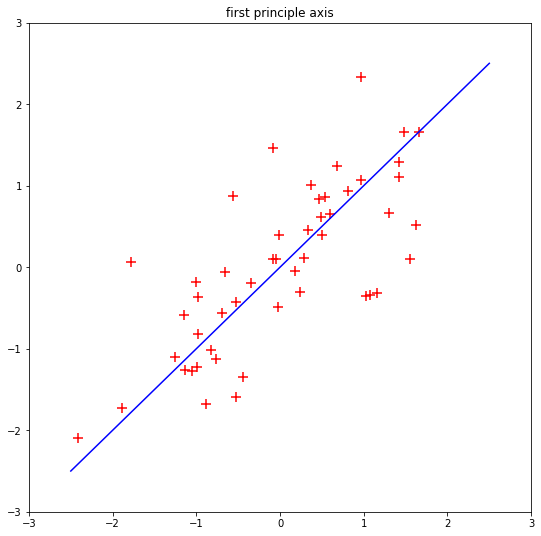

In [79]:
plt.figure(4,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_1st, y_1st, c='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

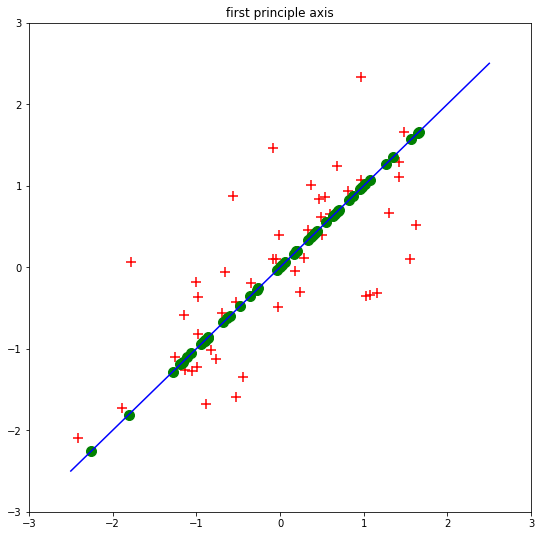

In [151]:
plt.figure(6,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_1st, y_1st, c='b')
plt.scatter(proj_1st[0], proj_1st[1], s=100, c='g')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

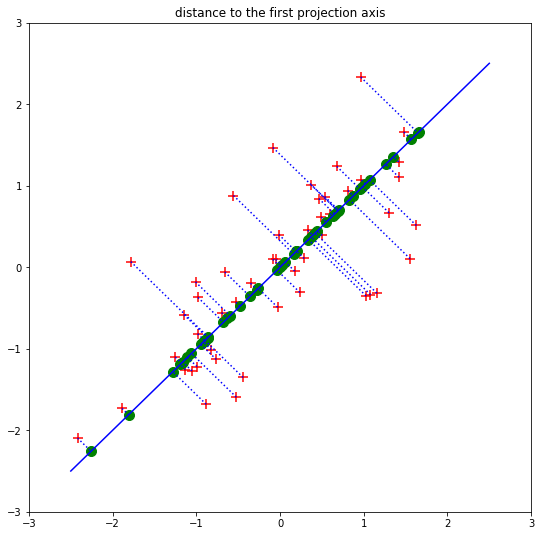

In [202]:
plt.figure(7,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_1st, y_1st, c='b')
plt.scatter(proj_1st[0], proj_1st[1], s=100, c='g')
for i in range(len(xn)):
    plt.plot(x_proj_1st[i], y_proj_1st[i], linestyle=':', c='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('distance to the first projection axis')
plt.show()

## 7. Plot the second principal axis [3pt]

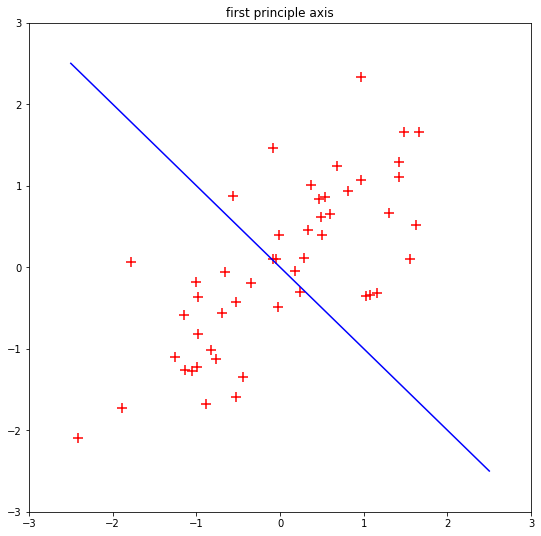

In [81]:
plt.figure(5,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_2nd, y_2nd, c='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

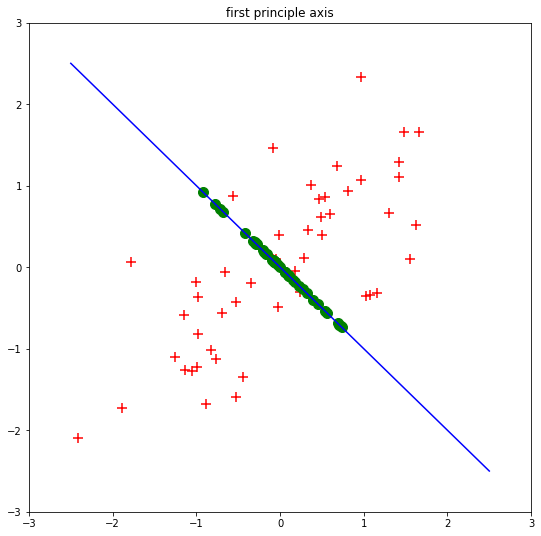

In [153]:
plt.figure(7,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.plot(x_2nd, y_2nd, c='b')
plt.scatter(proj_2nd[0], proj_2nd[1], s=100, c='g')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('first principle axis')
plt.show()

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]